# **SUPERVISED MACHINE LEARNING:**
# **MODELOS LOGÍSTICOS BINÁRIOS E MULTINOMIAIS**

MBA DATA SCIENCE & ANALYTICS USP/ESALQ

UNIVERSIDADE DE SÃO PAULO

Prof. Dr. Luiz Paulo Fávero

In [1]:
# Instalação dos pacotes.

# !pip install pandas
# !pip install numpy
# !pip install -U seaborn
# !pip install matplotlib
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install scikit-learn
# !pip install statstests

In [2]:
# Importação dos pacotes.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statstests.process import stepwise
from scipy import stats
import plotly.graph_objects as go 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.discrete.discrete_model import MNLogit
from math import exp
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay, recall_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## **CURVA SIGMOIDE**

In [3]:
# Estabelecendo uma função para a probabilidade de ocorrência de um evento.
def prob(z):
    return 1 / (1 + exp(-z))

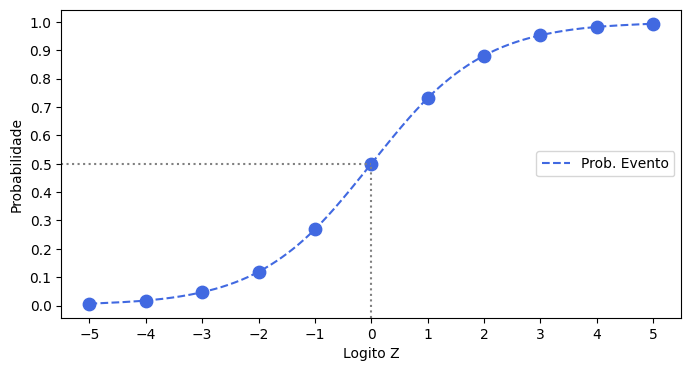

In [4]:
# In[SIGMOIDE]: Plotando a curva sigmoide teórica de ocorrência de um evento para um range do logito z entre -5 e +5.

logitos = []
probs = []

for i in np.arange(-5, 6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito': logitos, 'probs': probs})

# Interpolação spline (smooth probability line).
spline = UnivariateSpline(df['logito'], df['probs'], s=0)

logitos_smooth = np.linspace(df['logito'].min(), df['logito'].max(), 500)
probs_smooth = spline(logitos_smooth)

plt.figure(figsize=(8,4))
plt.plot(logitos_smooth, probs_smooth, color='royalblue',
         linestyle='--', label='Prob. Evento')
plt.scatter(df['logito'], df['probs'], color='royalblue', marker='o', s=80)
plt.axhline(y = df.probs.mean(), color = 'grey', linestyle = ':', xmax = .5)
plt.axvline(x = 0, color = 'grey', linestyle=':', ymax = 0.5)
plt.xlabel("Logito Z", fontsize=10)
plt.ylabel("Probabilidade", fontsize=10)
plt.xticks(np.arange(-5, 6), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()

## **REGRESSÃO LOGÍSTICA BINÁRIA**

In [5]:
# Buscando a base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/refs/heads/main/5.%20Modelos%20Log%C3%ADsticos%20Bin%C3%A1rios%20e%20Multinomiais/Dados/atrasado.csv'

df_atrasado = pd.read_csv(url,delimiter=',')
df_atrasado.head()

,estudante,atrasado,dist,sem
0,Gabriela,0,12.5,7
1,Patricia,0,13.3,10
2,Gustavo,0,13.4,8
3,Leticia,0,23.5,7
4,Luiz Ovidio,0,9.5,8


In [6]:
# Características das variáveis do dataset.
df_atrasado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int64  
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [7]:
# Estatísticas univariadas.
df_atrasado.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [8]:
# Tabela de frequências absolutas da variável 'atrasado'.
df_atrasado['atrasado'].value_counts().sort_index()

atrasado
0    41
1    59
Name: count, dtype: int64

In [9]:
# Estimação de um modelo logístico binário pela função 'smf.glm' ('statsmodels.formula.api').

modelo_atrasos = smf.glm(formula='atrasado ~ dist + sem', data=df_atrasado, family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_atrasos'.
modelo_atrasos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.466
Date:                Wed, 09 Oct 2024   Deviance:                       100.93
Time:                        03:24:59   Pearson chi2:                     86.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.712      -9.621
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

In [10]:
# Outputs do modelo pela função 'summary_col'.

summary_col([modelo_atrasos], model_names=["MODELO"], stars=True,
            info_dict = {'N':lambda x: "{0:d}".format(int(x.nobs)), 'Log-lik':lambda x: "{:.3f}".format(x.llf)})

,MODELO
Intercept,-26.1665***
,(8.4420)
dist,0.1904**
,(0.0764)
sem,2.3629***
,(0.7951)
N,100
Log-lik,-50.466


In [11]:
# Fazendo predições para o 'modelo_atrasos'.

#Exemplo: qual a probabilidade média de se chegar atrasado quando o trajeto tem 7 km e passa-se por 10 semáforos no percurso?
modelo_atrasos.predict(pd.DataFrame({'dist':[7], 'sem':[10]}))

0    0.230566
dtype: float64

### **Construção de uma matriz de confusão**

In [12]:
# Adicionando os valores previstos de probabilidade na base de dados.
df_atrasado['phat'] = modelo_atrasos.predict()

# Visualização da base de dados com a variável 'phat'.
df_atrasado.head()

,estudante,atrasado,dist,sem,phat
0,Gabriela,0,12.5,7,0.000712
1,Patricia,0,13.3,10,0.498561
2,Gustavo,0,13.4,8,0.008903
3,Leticia,0,23.5,7,0.005751
4,Luiz Ovidio,0,9.5,8,0.004257


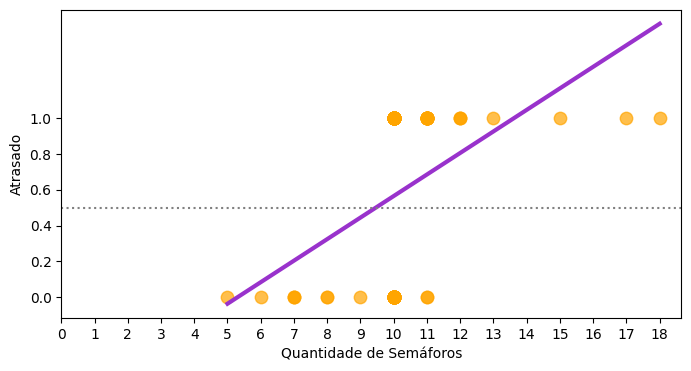

In [13]:
# Gráficos com ajustes entre a variável dependente e a variável 'sem'.
    
# Ajuste linear entre a variável dependente e a variável 'sem' (Gráfico errado: apenas para fins didáticos)

plt.figure(figsize=(8,4))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o',
            scatter_kws={'color':'orange', 's':80, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':3})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=10)
plt.ylabel('Atrasado', fontsize=10)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()

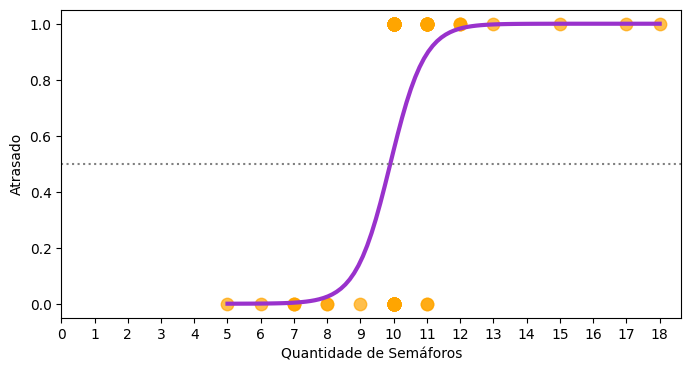

In [14]:
# Ajuste logístico determinístico entre a variável dependente e a variável 'sem'.
# Sigmoide.

plt.figure(figsize=(8,4))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':80, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':3})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=10)
plt.ylabel('Atrasado', fontsize=10)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()

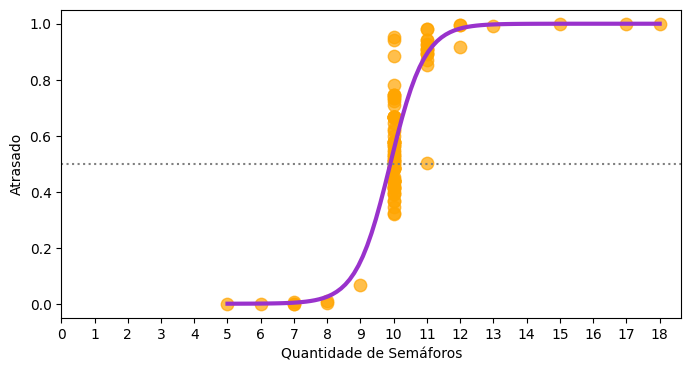

In [15]:
# In[1.8]: Ajuste logístico probabilístico entre a variável dependente e a variável 'sem'.
# Sigmoide.

plt.figure(figsize=(8,4))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['phat'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':80, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':3})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=10)
plt.ylabel('Atrasado', fontsize=10)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()

In [16]:
# Construção de função para a definição da matriz de confusão.

def matriz_confusao(predicts, observado, cutoff):
    values = predicts.values
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores desta matriz de confusão.
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade], 'Especificidade':[especificidade], 'Acurácia':[acuracia]})
    return indicadores

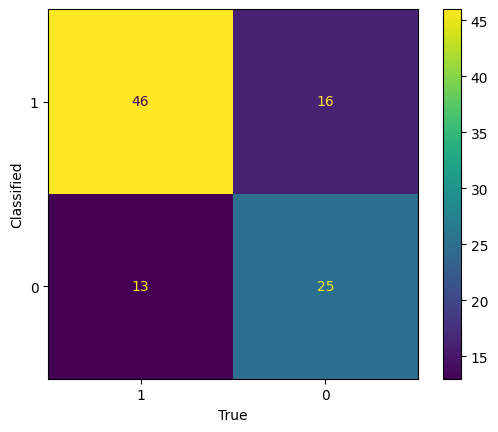

,Sensitividade,Especificidade,Acurácia
0,0.779661,0.609756,0.71


In [17]:
# Matriz de confusão para cutoff = 0.5.
matriz_confusao(observado=df_atrasado['atrasado'], predicts=df_atrasado['phat'], cutoff=0.5)

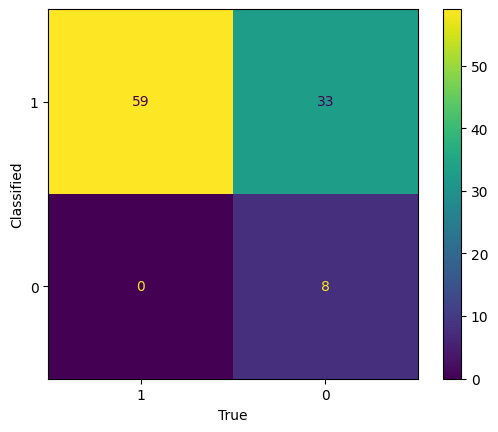

,Sensitividade,Especificidade,Acurácia
0,1.0,0.195122,0.67


In [18]:
# Matriz de confusão para cutoff = 0.3.
matriz_confusao(observado=df_atrasado['atrasado'], predicts=df_atrasado['phat'], cutoff=0.3)

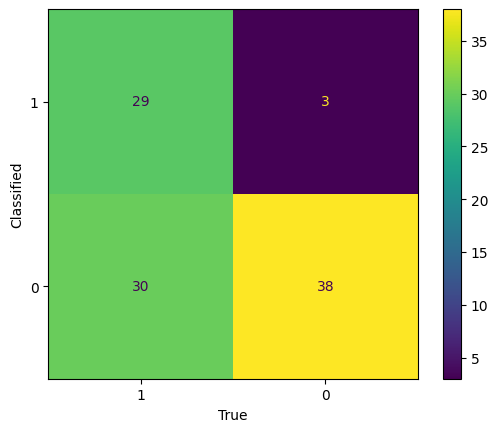

,Sensitividade,Especificidade,Acurácia
0,0.491525,0.926829,0.67


In [19]:
# Matriz de confusão para cutoff = 0.7.
matriz_confusao(observado=df_atrasado['atrasado'], predicts=df_atrasado['phat'], cutoff=0.7)

### **Igualando critérios de especificidade e de sensitividade.**

Tentaremos estabelecer um critério que iguale a probabilidade de acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de acerto daqueles que não chegarão atrasados (especificidade).

**ATENÇÃO:** o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA FORMA, o procedimento garante a maximização da acurácia do modelo!

In [20]:
# Criação da função 'espec_sens' para a construção de um dataset com diferentes valores de cutoff, sensitividade e especificidade:
def espec_sens(observado,predicts):
    
    # Adicionar objeto com os valores dos predicts.
    values = predicts.values
    
    # Range dos cutoffs a serem analisados em steps de 0.01.
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade.
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict.
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff.
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas.
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs.
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    
    return resultado

In [21]:
# Até o momento, foram extraídos 3 vetores: 'sensitividade', 'especificidade' e 'cutoffs'.
# Assim, criamos um dataframe que contém os vetores mencionados (dataframe 'dados_plotagem').

dados_plotagem = espec_sens(observado = df_atrasado['atrasado'], predicts = df_atrasado['phat'])
dados_plotagem.head()

,cutoffs,sensitividade,especificidade
0,0.00,1.0,0.000000
1,0.01,1.0,0.170732
2,0.02,1.0,0.170732
3,0.03,1.0,0.170732
4,0.04,1.0,0.170732


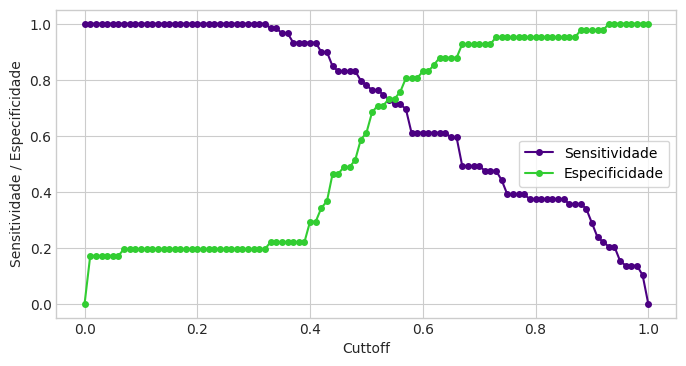

In [22]:
# Plotagem de um gráfico que mostra a variação da especificidade e da sensitividade em função do cutoff.
plt.figure(figsize=(8,4))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=4)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=4)
plt.xlabel('Cuttoff', fontsize=10)
plt.ylabel('Sensitividade / Especificidade', fontsize=10)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=10)
plt.show()

### **Construção da curva ROC**

In [23]:
# Função 'roc_curve' do pacote 'metrics' do sklearn.
fpr, tpr, thresholds =roc_curve(df_atrasado['atrasado'], df_atrasado['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI.
gini = (roc_auc - 0.5)/(0.5)
gini

0.59776767259198

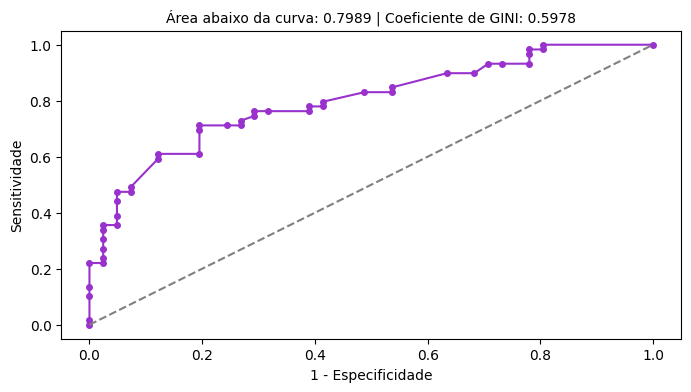

In [24]:
# Plotando a curva ROC.
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=4, linewidth=1.5)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=10)
plt.xlabel('1 - Especificidade', fontsize=10)
plt.ylabel('Sensitividade', fontsize=10)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()

## **REGRESSÃO LOGÍSTICA BINÁRIA E PROCEDIMENTO STEPWISE**

In [25]:
# Buscando a base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/refs/heads/main/5.%20Modelos%20Log%C3%ADsticos%20Bin%C3%A1rios%20e%20Multinomiais/Dados/challenger.csv'

df_challenger = pd.read_csv(url,delimiter=',')
df_challenger.head()

,desgaste,temperatura,pressao,t
0,0,66,50,1
1,1,70,50,2
2,0,69,50,3
3,0,68,50,4
4,0,67,50,5


In [26]:
# Características das variáveis do dataset.
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   desgaste     23 non-null     int64
 1   temperatura  23 non-null     int64
 2   pressao      23 non-null     int64
 3   t            23 non-null     int64
dtypes: int64(4)
memory usage: 864.0 bytes


In [27]:
# Estatísticas univariadas.
df_challenger.describe()

,desgaste,temperatura,pressao,t
count,23.000000,23.000000,23.000000,23.00000
mean,0.304348,69.565217,152.173913,12.00000
std,0.558796,7.057080,68.221332,6.78233
min,0.000000,53.000000,50.000000,1.00000
25%,0.000000,67.000000,75.000000,6.50000
50%,0.000000,70.000000,200.000000,12.00000
75%,0.500000,75.000000,200.000000,17.50000
max,2.000000,81.000000,200.000000,23.00000


- **desgaste:** quantidade de vezes em que ocorreu stress térmico.
- **temperatura:** temperatura de lançamento (graus ºF).
- **pressão:** pressão de verificação de vazamento (psi: libra-força por polegada ao quadrado).
- **t:** teste para o lançamento (id).

In [28]:
# Não há uma variável binária para servir como uma variável dependente, certo?
# Então vamos criá-la, considerando a ocorrência de desgastes de peças como a ocorrência de um evento que chamaremos de 'falha'.
df_challenger.loc[df_challenger['desgaste'] != 0 , 'falha'] = 1
df_challenger.loc[df_challenger['desgaste'] == 0, 'falha'] = 0

Transformando a variável 'falha' para o tipo 'int' (poderia também deixar como 'float'), a fim de que seja possível estimar o modelo por meio da função 'sm.Logit.from_formula'.

In [29]:
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   desgaste     23 non-null     int64  
 1   temperatura  23 non-null     int64  
 2   pressao      23 non-null     int64  
 3   t            23 non-null     int64  
 4   falha        23 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.0 KB


In [30]:
df_challenger['falha'] = df_challenger['falha'].astype('int64')
df_challenger.head()

,desgaste,temperatura,pressao,t,falha
0,0,66,50,1,0
1,1,70,50,2,1
2,0,69,50,3,0
3,0,68,50,4,0
4,0,67,50,5,0


In [31]:
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   desgaste     23 non-null     int64
 1   temperatura  23 non-null     int64
 2   pressao      23 non-null     int64
 3   t            23 non-null     int64
 4   falha        23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB


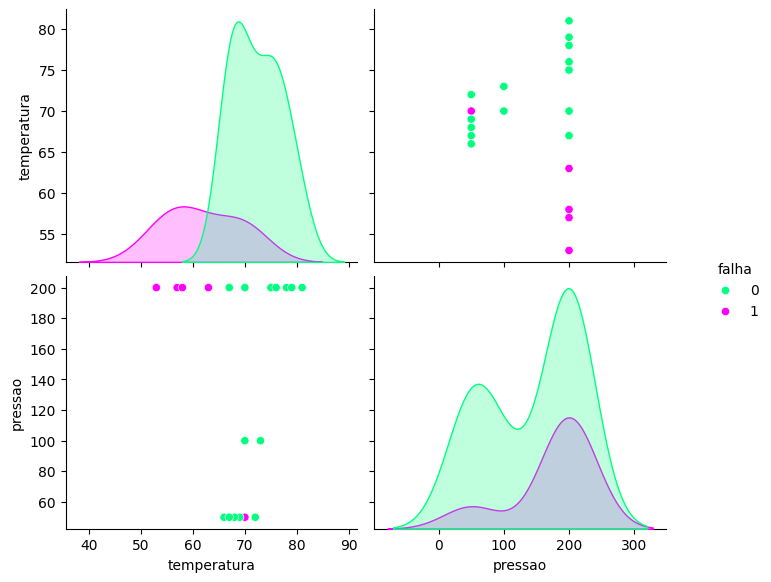

In [32]:
# Gráfico 'pairplot' com scatters e KDEs por 'falha'.
cores_desejadas = {0: 'springgreen', 1: 'magenta'}
g = sns.pairplot(df_challenger[['falha','temperatura','pressao']], hue='falha', palette=cores_desejadas)
g.fig.set_size_inches(8, 6)
plt.show()

In [33]:
# Estimação do modelo logístico binário pela função 'sm.Logit.from_formula' ('statsmodels.api').
# O modelo a seguir também pode ser estimado por meio da função 'smf.glm' ('statsmodels.formula.api').

modelo_challenger = sm.Logit.from_formula('falha ~ temperatura + pressao', df_challenger).fit()

# Parâmetros do 'modelo_challenger'.
modelo_challenger.summary()

Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.4685
Time:                        03:25:05   Log-Likelihood:                -7.0164
converged:                       True   LL-Null:                       -13.201
Covariance Type:            nonrobust   LLR p-value:                  0.002061
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.8436     11.936      1.830      0.067      -1.551      45.239
temperatura    -0.3501      0.173     -2.024      0.043      -0.689      -0.011
pressao         0.0060      0.010      0.616      0.538      -0.013       0.025
===============================================================================
"""

### **Procedimento Stepwise**

In [34]:
# Estimação do modelo por meio do procedimento Stepwise.
step_challenger = stepwise(modelo_challenger, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 falha ~ Q('temperatura') + Q('pressao')
Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8

 Discarding atribute "Q('pressao')" with p-value equal to 0.5378022290437207 

Estimating model...: 
 falha ~ Q('temperatura')
Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('pressao')", 'p-value': 0.5378022290437207}

 Model after stepwise process...: 
 falha ~ Q('temperatura') 

                           Logit Regression Results                           
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Oct 2024   Pseudo 

In [35]:
# In[2.5]: Fazendo predições para o modelo 'step_challenger'

# Exemplo 1: qual a probabilidade média de falha a 70ºF (~21.11ºC)?
print(step_challenger.predict(pd.DataFrame({'temperatura':[70]})),'\n')

# Exemplo 2: qual a probabilidade média de falha a 77ºF (25ºC)?
print(step_challenger.predict(pd.DataFrame({'temperatura':[77]})),'\n')

# Exemplo 3: qual a probabilidade média de falha a 34ºF (~1.11ºC)?
# Temperatura no momento do lançamento
print(step_challenger.predict(pd.DataFrame({'temperatura':[34]})))

0    0.130777
dtype: float64 

0    0.011419
dtype: float64 

0    0.999988
dtype: float64


In [36]:
# Atribuindo uma coluna no dataframe para os resultados.
df_challenger['phat'] = step_challenger.predict()
df_challenger.head()

,desgaste,temperatura,pressao,t,falha,phat
0,0,66,50,1,0,0.394770
1,1,70,50,2,1,0.130777
2,0,69,50,3,0,0.178373
3,0,68,50,4,0,0.238539
4,0,67,50,5,0,0.311309


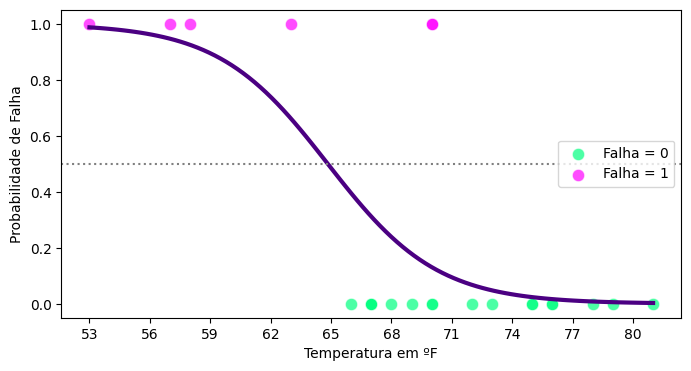

In [37]:
# Construção da sigmoide.
# Probabilidade de evento em função da variável 'temperatura'.

plt.figure(figsize=(8,4))
sns.scatterplot(x=df_challenger['temperatura'][df_challenger['falha'] == 0],
                y=df_challenger['falha'][df_challenger['falha'] == 0],
                color='springgreen', alpha=0.7, s=80, label='Falha = 0')
sns.scatterplot(x=df_challenger['temperatura'][df_challenger['falha'] == 1],
                y=df_challenger['falha'][df_challenger['falha'] == 1],
                color='magenta', alpha=0.7, s=80, label='Falha = 1')
sns.regplot(x=df_challenger['temperatura'], y=df_challenger['falha'],
            logistic=True, ci=None, scatter=False,
            line_kws={'color': 'indigo', 'linewidth': 3})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Temperatura em ºF', fontsize=10)
plt.ylabel('Probabilidade de Falha', fontsize=10)
plt.xticks(np.arange(df_challenger['temperatura'].min(),
                     df_challenger['temperatura'].max() + 0.01, 3),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(fontsize=10, loc='center right')
plt.show()

## **REGRESSÃO LOGÍSTICA BINÁRIA COM VARIÁVEIS EXPLICATIVAS QUANTI E QUALIS**

In [38]:
# Buscando a base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/refs/heads/main/5.%20Modelos%20Log%C3%ADsticos%20Bin%C3%A1rios%20e%20Multinomiais/Dados/dados_fidelidade.csv'


df_fidelidade = pd.read_csv(url,delimiter=',')
df_fidelidade.head()

,id,fidelidade,sexo,idade,atendimento,sortimento,acessibilidade,preço
0,1,nao,feminino,34,2,2,1,1
1,2,nao,feminino,34,2,2,1,1
2,3,nao,masculino,34,3,2,4,2
3,4,nao,feminino,34,4,3,3,3
4,5,nao,feminino,34,4,3,1,4


In [39]:
# Características das variáveis do dataset.
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   int64 
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   int64 
 5   sortimento      3000 non-null   int64 
 6   acessibilidade  3000 non-null   int64 
 7   preço           3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


In [40]:
# Estatísticas univariadas.
df_fidelidade.describe()

,id,idade,atendimento,sortimento,acessibilidade,preço
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,34.21000,3.490000,3.360000,3.330000,3.380000
std,866.169729,1.57058,0.964474,1.221023,1.296789,1.017814
min,1.000000,29.00000,1.000000,1.000000,1.000000,1.000000
25%,750.750000,34.00000,3.000000,2.750000,3.000000,3.000000
50%,1500.500000,34.00000,4.000000,4.000000,3.000000,3.000000
75%,2250.250000,34.00000,4.000000,4.000000,5.000000,4.000000
max,3000.000000,42.00000,5.000000,5.000000,5.000000,5.000000


In [41]:
# Alteração dos tipos das variáveis não quantitativas no dataframe.

# Transformação do 'id' para o tipo 'str'.
df_fidelidade['id'] = df_fidelidade['id'].astype('str')

# Transformação das variáveis explicativas qualitativas para o tipo 'object'.
df_fidelidade['atendimento'] = df_fidelidade['atendimento'].astype('object')
df_fidelidade['sortimento'] = df_fidelidade['sortimento'].astype('object')
df_fidelidade['acessibilidade'] = df_fidelidade['acessibilidade'].astype('object')
df_fidelidade['preço'] = df_fidelidade['preço'].astype('object')

# Características das variáveis do dataset.
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   object
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   object
 5   sortimento      3000 non-null   object
 6   acessibilidade  3000 non-null   object
 7   preço           3000 non-null   object
dtypes: int64(1), object(7)
memory usage: 187.6+ KB


In [42]:
# Estatísticas univariadas.
df_fidelidade.describe()

,idade
count,3000.00000
mean,34.21000
std,1.57058
min,29.00000
25%,34.00000
50%,34.00000
75%,34.00000
max,42.00000


**Note que a variável Y 'fidelidade' está definida como objeto (PROBLEMA!!!)**

Transformando a variável Y para 0 e 1 e para o tipo 'int' (poderia também ser do tipo 'float'), a fim de que seja possível estimar o modelo por meio da função 'sm.Logit.from_formula'.


In [43]:
df_fidelidade.loc[df_fidelidade['fidelidade']=='sim', 'fidelidade'] = 1
df_fidelidade.loc[df_fidelidade['fidelidade']=='nao', 'fidelidade'] = 0

df_fidelidade['fidelidade'] = df_fidelidade['fidelidade'].astype('int64')

df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   object
 1   fidelidade      3000 non-null   int64 
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   object
 5   sortimento      3000 non-null   object
 6   acessibilidade  3000 non-null   object
 7   preço           3000 non-null   object
dtypes: int64(2), object(6)
memory usage: 187.6+ KB


In [44]:
# Dummizando as variáveis 'atendimento', 'sortimento', 'acessibilidade', 'preço' e 'sexo'.
# O código abaixo, automaticamente, fará:
#    a) a dummização das variáveis originais;
#    b) a remoção das variáveis dummizadas originais;
#    c) a definição das categorias de label 1 de cada variável original como categorias de referência, por meio do argumento 'drop_first=True'.

df_fidelidade_dummies = pd.get_dummies(df_fidelidade, columns=[
    'atendimento',
    'sortimento',
    'acessibilidade',
    'preço',
    'sexo'],
dtype=int,
drop_first=True)

df_fidelidade_dummies.head()

,id,fidelidade,idade,atendimento_2,atendimento_3,atendimento_4,atendimento_5,sortimento_2,sortimento_3,sortimento_4,sortimento_5,acessibilidade_2,acessibilidade_3,acessibilidade_4,acessibilidade_5,preço_2,preço_3,preço_4,preço_5,sexo_masculino
0,1,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,34,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,4,0,34,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,0,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# Estimação do modelo logístico binário.

# Sugestão de uso neste caso, dada a existência de muitas dummies no dataframe.
# Definição da fórmula utilizada no modelo.

lista_colunas = list(df_fidelidade_dummies.drop(columns=['id', 'fidelidade']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "fidelidade ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

# Modelo propriamente dito.
modelo_fidelidade = sm.Logit.from_formula(formula_dummies_modelo, df_fidelidade_dummies).fit()

# Parâmetros do 'modelo_fidelidade'.
modelo_fidelidade.summary()

Fórmula utilizada:  fidelidade ~ idade + atendimento_2 + atendimento_3 + atendimento_4 + atendimento_5 + sortimento_2 + sortimento_3 + sortimento_4 + sortimento_5 + acessibilidade_2 + acessibilidade_3 + acessibilidade_4 + acessibilidade_5 + preço_2 + preço_3 + preço_4 + preço_5 + sexo_masculino
Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fidelidade   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2981
Method:                           MLE   Df Model:                           18
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.6241
Time:                        03:25:07   Log-Likelihood:                -773.57
converged:                       True   LL-Null:                       -2057.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -68.9866      6.055    -11.394      0.000     -80.854     -57.120
idade                1.6870      0.176      9.561      0.000       1.341       2.033
atendimento_2        1.6808      0.336      5.004      0.000       1.023       2.339
atendimento_3        1.8172      0.342      5.321      0.000       1.148       2.487
atendimento_4        3.3168      0.311     10.651      0.000       2.706       3.927
atendimento_5        4.3119      0.432      9.977      0.000       3.465       5.159
sortimento_2         1.8503      0.396      4.671      0.000       1.074       2.627
sortimento_3         2.0511      0.321      6.389      0.000       1.422       2.680
sortimento_4         3.3290      0.320     10.388      0.000       2.701       3.957
sortimento_5         5.9365      0.402     14.755      0.000       5.148       6.725
acessibilidade_2     2.3475      0.446      5.258      0.000       1.473       3.223
acessibilidade_3     2.9229      0.281     10.404      0.000       2.372       3.474
acessibilidade_4     4.2907      2.123      2.021      0.043       0.130       8.451
acessibilidade_5     5.3662      0.376     14.260      0.000       4.629       6.104
preço_2              0.5706      2.122      0.269      0.788      -3.589       4.730
preço_3              2.9216      0.390      7.486      0.000       2.157       3.687
preço_4              3.0393      0.416      7.314      0.000       2.225       3.854
preço_5              3.9142      0.442      8.849      0.000       3.047       4.781
sexo_masculino       1.7695      0.197      8.962      0.000       1.383       2.157
====================================================================================
"""

In [46]:
#Estimação do modelo por meio do procedimento Stepwise.
step_modelo_fidelidade = stepwise(modelo_fidelidade, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_2') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9

 Discarding atribute "Q('preço_2')" with p-value equal to 0.7880570577805084 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated succes

In [48]:
# Construção da matriz de confusão.

# Adicionando os valores previstos de probabilidade na base de dados.
df_fidelidade_dummies['phat'] = step_modelo_fidelidade.predict()
df_fidelidade_dummies.head()

,id,fidelidade,idade,atendimento_2,atendimento_3,atendimento_4,atendimento_5,sortimento_2,sortimento_3,sortimento_4,...,acessibilidade_2,acessibilidade_3,acessibilidade_4,acessibilidade_5,preço_2,preço_3,preço_4,preço_5,sexo_masculino,phat
0,1,0,34,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000307
1,2,0,34,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000307
2,3,0,34,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0.208086
3,4,0,34,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0.398124
4,5,0,34,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.038641


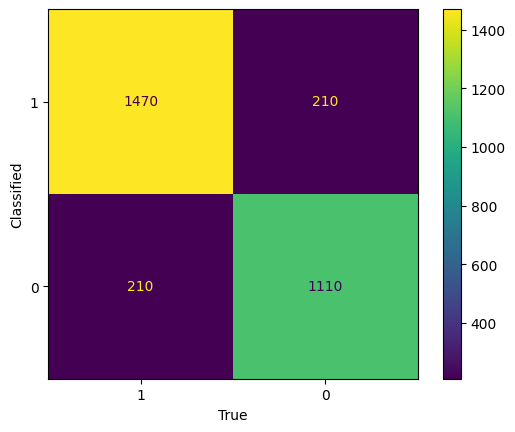

,Sensitividade,Especificidade,Acurácia
0,0.875,0.840909,0.86


In [49]:
# Matriz de confusão para cutoff = 0.5.
matriz_confusao(observado=df_fidelidade_dummies['fidelidade'], predicts=df_fidelidade_dummies['phat'], cutoff=0.50)

In [51]:
dados_plotagem = espec_sens(observado = df_fidelidade_dummies['fidelidade'], predicts = df_fidelidade_dummies['phat'])
dados_plotagem.head()

,cutoffs,sensitividade,especificidade
0,0.00,1.0,0.000000
1,0.01,1.0,0.295455
2,0.02,1.0,0.318182
3,0.03,1.0,0.340909
4,0.04,1.0,0.386364


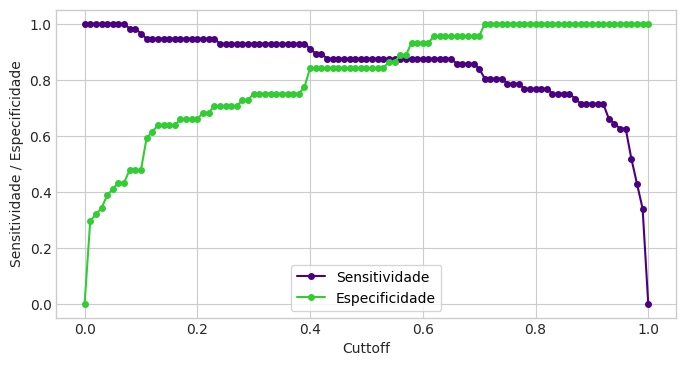

In [53]:
# Plotagem de um gráfico que mostra a variação da especificidade e da sensitividade em função do cutoff.

plt.figure(figsize=(8,4))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=4)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=4)
plt.xlabel('Cuttoff', fontsize=10)
plt.ylabel('Sensitividade / Especificidade', fontsize=10)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=10)
plt.show()

In [55]:
# Construção da curva ROC.
# Função 'roc_curve' do pacote 'metrics' do sklearn.
fpr, tpr, thresholds =roc_curve(df_fidelidade_dummies['fidelidade'], df_fidelidade_dummies['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI.
gini = (roc_auc - 0.5)/(0.5)
gini

0.911525974025974

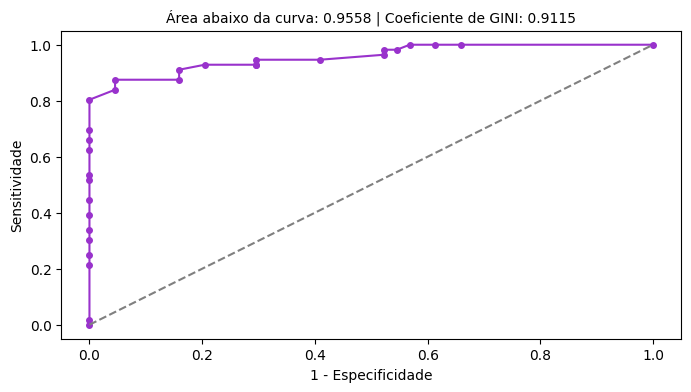

In [60]:
# Plotando a curva ROC.
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=4, linewidth=1.5)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=10)
plt.xlabel('1 - Especificidade', fontsize=10)
plt.ylabel('Sensitividade', fontsize=10)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()

## **REGRESSÃO LOGÍSTICA MULTINOMIAL**

In [63]:
# Buscando a base de dados.
url = 'https://raw.githubusercontent.com/filipecarbonera/MBA_USP_Data_Science_Analytics/refs/heads/main/5.%20Modelos%20Log%C3%ADsticos%20Bin%C3%A1rios%20e%20Multinomiais/Dados/atrasado_multinomial.csv'
df_atrasado_multinomial = pd.read_csv(url,delimiter=',')
df_atrasado_multinomial.head()

,estudante,atrasado,dist,sem
0,Gabriela,chegou atrasado segunda aula,20.500000,15
1,Patricia,chegou atrasado segunda aula,21.299999,18
2,Gustavo,chegou atrasado segunda aula,21.400000,16
3,Leticia,chegou atrasado segunda aula,31.500000,15
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16


In [64]:
# Características das variáveis do dataset.
df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [65]:
# Estatísticas univariadas.
df_atrasado_multinomial.describe()

,dist,sem
count,100.000000,100.000000
mean,17.673000,13.810000
std,5.130299,3.329376
min,1.000000,10.000000
25%,14.950000,10.000000
50%,18.750000,15.000000
75%,21.000000,18.000000
max,31.500000,19.000000


In [66]:
# Note que a variável Y 'atrasado' está definida como objeto.
# Tabela de frequências absolutas da variável 'atrasado' com labels.
df_atrasado_multinomial['atrasado'].value_counts().sort_index()

atrasado
chegou atrasado primeira aula    16
chegou atrasado segunda aula     35
nao chegou atrasado              49
Name: count, dtype: int64

Criando uma variável 'atrasado2' a partir da variável 'atrasado', com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo 'float'), a fim de que seja possível estimar o modelo por meio da função 'MNLogit' do pacote 'statsmodels.discrete.discrete_model'.

In [67]:
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']== 'nao chegou atrasado', 'atrasado2'] = 0 #categoria de referência

df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']== 'chegou atrasado primeira aula', 'atrasado2'] = 1

df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']== 'chegou atrasado segunda aula', 'atrasado2'] = 2

In [69]:
# Definição do tipo 'int' para a variável dependente 'atrasado2'.
df_atrasado_multinomial['atrasado2'] = df_atrasado_multinomial['atrasado2'].astype('int64')
df_atrasado_multinomial.head()

,estudante,atrasado,dist,sem,atrasado2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2
1,Patricia,chegou atrasado segunda aula,21.299999,18,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2


In [70]:
df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
 4   atrasado2  100 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [71]:
# Estimação do modelo logístico multinomial.
x = df_atrasado_multinomial.drop(columns=['estudante','atrasado','atrasado2'])
y = df_atrasado_multinomial['atrasado2']

# Esse pacote precisa que a constante seja definida pelo usuário.
X = sm.add_constant(x)

# Estimação do modelo - função 'MNLogit' ('statsmodels.discrete.discrete_model').
modelo_atrasado = MNLogit(endog=y, exog=X).fit()

# Parâmetros do modelo 'modelo_atrasado'.
modelo_atrasado.summary()

Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              atrasado2   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.7574
Time:                        03:35:21   Log-Likelihood:                -24.512
converged:                       True   LL-Null:                       -101.02
Covariance Type:            nonrobust   LLR p-value:                 4.598e-32
===============================================================================
atrasado2=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.1352     12.183     -2.720      0.007     -57.014      -9.256
dist            0.5588      0.243      2.297      0.022       0.082       1.036
sem             1.6699      0.577      2.895      0.004       0.539       2.801
-------------------------------------------------------------------------------
atrasado2=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -62.2922     14.675     -4.245      0.000     -91.055     -33.530
dist            1.0784      0.302      3.566      0.000       0.486       1.671
sem             2.8949      0.686      4.220      0.000       1.550       4.239
===============================================================================
"""

In [72]:
# Vamos definir uma função 'Qui2' para se extrair a estatística geral do modelo.

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2], 'pvalue':[pvalue]})
    
    return df

In [74]:
# Estatística geral do 'modelo_atrasado'.
Qui2(modelo_atrasado)

,Qui quadrado,pvalue
0,153.014842,3.802150e-35


In [75]:
#  Fazendo predições para o 'modelo_atrasado'.

# Exemplo: qual a probabilidade média de atraso para cada categoria da variável dependente,
#   se o indivíduo tiver que percorrer 22km e passar por 12 semáforos?

# No nosso exemplo, temos os seguintes labels para a variável 'atrasado2':
#   0: não chegou atrasado
#   1: chegou atrasado primeira aula
#   2: chegou atrasado segunda aula

resultado = modelo_atrasado.predict(pd.DataFrame({'const':[1], 'dist':[22], 'sem':[12]})).round(4)
resultado

,0,1,2
0,0.6802,0.305,0.0148


In [76]:
# Uma maneira de identificar a classe do resultado de acordo com o 'predict'.
resultado.idxmax(axis=1)

0    0
dtype: int64

Adicionando as probabilidades de ocorrência de cada uma das categorias de Y definidas pela modelagem ao dataframe original, bem como a respectiva ..;.,.classificação.

In [79]:
# Probabilidades de ocorrência das três categoriais.
# Definição do array 'phats':
phats = modelo_atrasado.predict()
phats

array([[1.80102363e-02, 5.23387941e-01, 4.58601822e-01],
       [2.75130062e-06, 1.87367571e-02, 9.81260492e-01],
       [6.79619018e-04, 1.73471514e-01, 8.25848867e-01],
       [2.75947562e-07, 3.74792245e-03, 9.96251802e-01],
       [2.08378239e-02, 6.01588294e-01, 3.77573882e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.22165091e-06, 1.69188816e-02, 9.83078897e-01],
       [2.89390852e-07, 6.37240812e-03, 9.93627302e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [6.13907187e-07, 9.14185529e-03, 9.90857531e-01],
       [1.79364087e-06, 1.52746327e-02, 9.84723574e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [1.14468666e-08, 1.34770371e-03, 9.98652285e-01],
       [5.85478765e-02, 7.30993731e-01, 2.10458393e-01],
       [3.15016602e-05, 5.93319231e-02, 9.40636575e-01],
       [2.64359782e-02, 5.80967070e-01, 3.92596952e-01],
       [1.30075533e-06, 1.30990445e-02, 9.86899655e-01],
       [2.55399681e-05, 5.37916

In [81]:
# Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats.head()

,0,1,2
0,1.801024e-02,0.523388,0.458602
1,2.751301e-06,0.018737,0.981260
2,6.796190e-04,0.173472,0.825849
3,2.759476e-07,0.003748,0.996252
4,2.083782e-02,0.601588,0.377574


In [83]:
# Concatenando o dataframe original com o dataframe 'phats':
df_atrasado_multinomial = pd.concat([df_atrasado_multinomial, phats], axis=1)
df_atrasado_multinomial.head()

,estudante,atrasado,dist,sem,atrasado2,0,1,2,0,1,2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,0.458602,1.801024e-02,0.523388,0.458602
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,0.981260,2.751301e-06,0.018737,0.981260
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,0.825849,6.796190e-04,0.173472,0.825849
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,0.996252,2.759476e-07,0.003748,0.996252
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,0.377574,2.083782e-02,0.601588,0.377574


In [84]:
# Analisando o resultado de acordo com a categoria de resposta:
predicao = phats.idxmax(axis=1)
predicao.head()

0    1
1    2
2    2
3    2
4    1
dtype: int64

In [86]:
# Adicionando a categoria de resposta 'predicao' ao dataframe original, por meio da criação da variável 'predicao'.
df_atrasado_multinomial['predicao'] = predicao
df_atrasado_multinomial.head()

,estudante,atrasado,dist,sem,atrasado2,0,1,2,0,1,2,predicao
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,0.458602,1.801024e-02,0.523388,0.458602,1
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,0.981260,2.751301e-06,0.018737,0.981260,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,0.825849,6.796190e-04,0.173472,0.825849,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,0.996252,2.759476e-07,0.003748,0.996252,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,0.377574,2.083782e-02,0.601588,0.377574,1
